## Name: Juwon Siyanbade
## Project: Annual Salary Prediction for IT Professionals

As technology continues to advance and the importance of IT in various industries grows, the demand for skilled IT professionals is on the rise. As a result, there is a growing interest in predicting the salaries of IT professionals based on various factors such as their education, experience, job role, and location. 

In this project, I aim to develop a machine learning model to predict the annual salary of individuals working in the IT industry. By analyzing a large dataset of IT professionals' salaries and their corresponding features, I will train a model to accurately predict salaries based on a given set of input parameters. 

The project will utilize various data processing and modeling techniques to ensure the accuracy and reliability of predictions. The resulting model can be used by IT professionals, recruiters, and employers to gain insights into the factors that influence salaries and to make informed decisions regarding job offers and salary negotiations. Ultimately, this project has the potential to contribute to the development of fair and equitable compensation practices in the IT industry.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

### The data

The dataset used was adapted from Stack Overflow Annual Developer Survey. The survey covers an extensive query completed by over 60,000 developers from over 180 countries each year. The data used in this project is from the last 3 years 2020-2022. The dataset and the result from the analysis by Stack Overflow can be found on: https://insights.stackoverflow.com/survey

In [2]:
# Import and preview datasets
df_2020= pd.read_csv('survey_results_public_2020.csv')
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
# Examine data information
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [4]:
df_2021= pd.read_csv('survey_results_public_2021.csv')
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [5]:
df_2022= pd.read_csv('survey_results_public_2022.csv')
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

From the information above, there are null values in the datasets which will not be particularly useful in this analysis and model development. There are also too many columns. The most relevant few will be selected for further processing. This is a good place to reiterate that the aim of this project is prediction (regression).

In [6]:
# Select most relevant columns for analysis
df_2020= df_2020[['Country','Age','EdLevel','YearsCodePro','Employment','ConvertedComp']]
df_2021= df_2021[['Country','Age','EdLevel','YearsCodePro','Employment','ConvertedCompYearly']]
df_2022= df_2022[['Country','Age','EdLevel','YearsCodePro','Employment','ConvertedCompYearly']]

# Rename the ConvertedComp for easy comprehension
df_2020= df_2020.rename(columns={'ConvertedComp':'Salary'})
df_2021= df_2021.rename(columns={'ConvertedCompYearly':'Salary'})
df_2022= df_2022.rename(columns={'ConvertedCompYearly':'Salary'})

# Merge the dataframes
df= pd.concat([df_2020, df_2021,df_2022], ignore_index=True, sort=False)

df

,Country,Age,EdLevel,YearsCodePro,Employment,Salary
0,Germany,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,31.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN
...,...,...,...,...,...,...
221163,Nigeria,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Employed, full-time",NaN
221164,United States of America,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",NaN
221165,United States of America,55-64 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",33,"Employed, full-time",NaN
221166,United Kingdom of Great Britain and Northern I...,55-64 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",31,"Employed, full-time",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221168 entries, 0 to 221167
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country       219282 non-null  object 
 1   Age           198799 non-null  object 
 2   EdLevel       212128 non-null  object 
 3   YearsCodePro  159398 non-null  object 
 4   Employment    218886 non-null  object 
 5   Salary        119671 non-null  float64
dtypes: float64(1), object(5)
memory usage: 10.1+ MB


### Clean the dataset

In [8]:
# Check for missing values
df.isnull().sum()

Country           1886
Age              22369
EdLevel           9040
YearsCodePro     61770
Employment        2282
Salary          101497
dtype: int64

In [9]:
# We have a big dataset so we can clean the dataframe by removing null values
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114078 entries, 7 to 221021
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country       114078 non-null  object 
 1   Age           114078 non-null  object 
 2   EdLevel       114078 non-null  object 
 3   YearsCodePro  114078 non-null  object 
 4   Employment    114078 non-null  object 
 5   Salary        114078 non-null  float64
dtypes: float64(1), object(5)
memory usage: 6.1+ MB


In [10]:
# Clean Employment column
df.Employment.unique()

array(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed part-time', 'I prefer not to say', 'Retired',
       'Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Employed, part-time;Retired', 'Employed, full-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [11]:
# We assume that those employed full time have gained some stability in the industry
#Function to clean Employment column
def clean_employment(x):
    if 'Employed full-time' in x or 'Employed, full-time' in x:
        return 'Employed full-time'
    return "Not employed full-time"

df['Employment']= df['Employment'].apply(clean_employment)

/var/folders/pm/khs7v4cn0yqfqsxnwb7svd8c0000gn/T/ipykernel_5026/1461254512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Employment']= df['Employment'].apply(clean_employment)


In [12]:
df= df[df['Employment']=='Employed full-time']
df= df.drop('Employment', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100829 entries, 7 to 221021
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country       100829 non-null  object 
 1   Age           100829 non-null  object 
 2   EdLevel       100829 non-null  object 
 3   YearsCodePro  100829 non-null  object 
 4   Salary        100829 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.6+ MB


In [13]:
# Clean Age column
df['Age'].unique()

array([36.0, 22.0, 23.0, 49.0, 53.0, 27.0, 25.0, 32.0, 24.0, 45.0, 31.0,
       39.0, 34.0, 35.0, 38.0, 28.0, 44.0, 48.0, 20.0, 42.0, 21.0, 30.0,
       29.0, 26.0, 41.0, 37.0, 43.0, 40.0, 57.0, 50.0, 59.0, 62.0, 33.0,
       51.0, 52.0, 46.0, 49.5, 63.0, 47.0, 56.0, 19.0, 54.0, 61.0, 18.0,
       60.0, 26.8, 64.0, 65.0, 84.0, 55.0, 17.0, 58.0, 68.0, 99.0, 73.0,
       69.0, 16.0, 32.5, 23.8, 72.0, 96.0, 70.0, 66.0, 279.0, 22.5, 27.5,
       1.0, 15.0, 98.0, 67.0, 31.5, 39.5, 71.0, 81.0, 83.0, 12.0, 89.0,
       '25-34 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '55-64 years old', '65 years or older',
       'Under 18 years old', 'Prefer not to say'], dtype=object)

In [14]:
# Function to clean the values in age
def clean_age(x):
    if x == '25-34 years old':
        return 34
    if x == '35-44 years old':
        return 44
    if x == '45-54 years old':
        return 54
    if x == '18-24 years old':
        return 24
    if x == '55-64 years old':
        return 64
    if x == '65 years or older':
        return 65
    if x == 'Under 18 years old':
        return 17
    if x == 'Prefer not to say':
        return np.nan
    return int(x)

df['Age'] = df['Age'].apply(clean_age)

In [15]:
df= df.dropna()
# Categorize the ages into groups
conditions = [
    (df['Age'] <= 18),
    (df['Age'] > 18) & (df['Age'] <= 39),
    (df['Age'] > 39) & (df['Age'] <= 65),
    (df['Age'] > 65)
    ]

# create a list of the values we want to assign for each condition
values = ['less than 18', '18-39', '40-65', 'older than 65']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Age'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Country,Age,EdLevel,YearsCodePro,Salary
7,United States,18-39,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,18-39,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,18-39,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,40-65,Some college/university study without earning ...,7,14268.0
12,Netherlands,40-65,"Secondary school (e.g. American high school, G...",20,38916.0


In [16]:
# Clean Country column
df['Country'].value_counts()

United States of America                                17368
India                                                    7403
Germany                                                  7009
United States                                            6724
United Kingdom of Great Britain and Northern Ireland     5013
                                                        ...  
Saint Kitts and Nevis                                       1
Djibouti                                                    1
Dominica                                                    1
Bahamas                                                     1
Seychelles                                                  1
Name: Country, Length: 176, dtype: int64

In [17]:
# Function to combine categories based on requirements
def shorten_category(category, mark):
    categorical_map= {}
    for i in range(len(category)):
        if category.values[i] >= mark:
            categorical_map[category.index[i]]= category.index[i]
        else:
            categorical_map[category.index[i]]= 'Others'
    return categorical_map

In [18]:
# If there are less than 200 respondents from a country, the country will be put in others
mark= 200
country_map= shorten_category(df.Country.value_counts(),mark)
df['Country']= df['Country'].map(country_map)
df.Country.value_counts()

United States of America                                17368
India                                                    7403
Germany                                                  7009
United States                                            6724
United Kingdom of Great Britain and Northern Ireland     5013
                                                        ...  
Estonia                                                   248
Slovakia                                                  222
South Korea                                               216
Nepal                                                     210
Iran                                                      206
Name: Country, Length: 62, dtype: int64

In [19]:
def clean_country(x):
    if x == 'United States':
        return 'United States of America'
    if x == 'United Kingdom of Great Britain and Northern Ireland':
        return 'United Kingdom'
    if x == 'Iran, Islamic Republic of...':
        return 'Iran'
    return x

df['Country'] = df['Country'].apply(clean_country)

In [20]:
print(f"There are {len(df.Country.unique())} countries with over {mark} respondents including Others")
print(list(df.Country.unique()))

There are 59 countries with over 200 respondents including Others
['United States of America', 'United Kingdom', 'Spain', 'Netherlands', 'Germany', 'Canada', 'Belgium', 'Italy', 'Brazil', 'France', 'Poland', 'Indonesia', 'Greece', 'Czech Republic', 'India', 'Ukraine', 'Switzerland', 'Hungary', 'Romania', 'Portugal', 'Mexico', 'Israel', 'Nigeria', 'Finland', 'Sweden', 'Austria', 'Turkey', 'Others', 'Ireland', 'Estonia', 'Philippines', 'Australia', 'Sri Lanka', 'Taiwan', 'Croatia', 'Egypt', 'Argentina', 'Iran', 'Norway', 'Pakistan', 'Lithuania', 'Nepal', 'Denmark', 'Bangladesh', 'Russian Federation', 'South Africa', 'Chile', 'Colombia', 'Serbia', 'New Zealand', 'Singapore', 'Bulgaria', 'Slovenia', 'China', 'Japan', 'Malaysia', 'Viet Nam', 'South Korea', 'Slovakia']


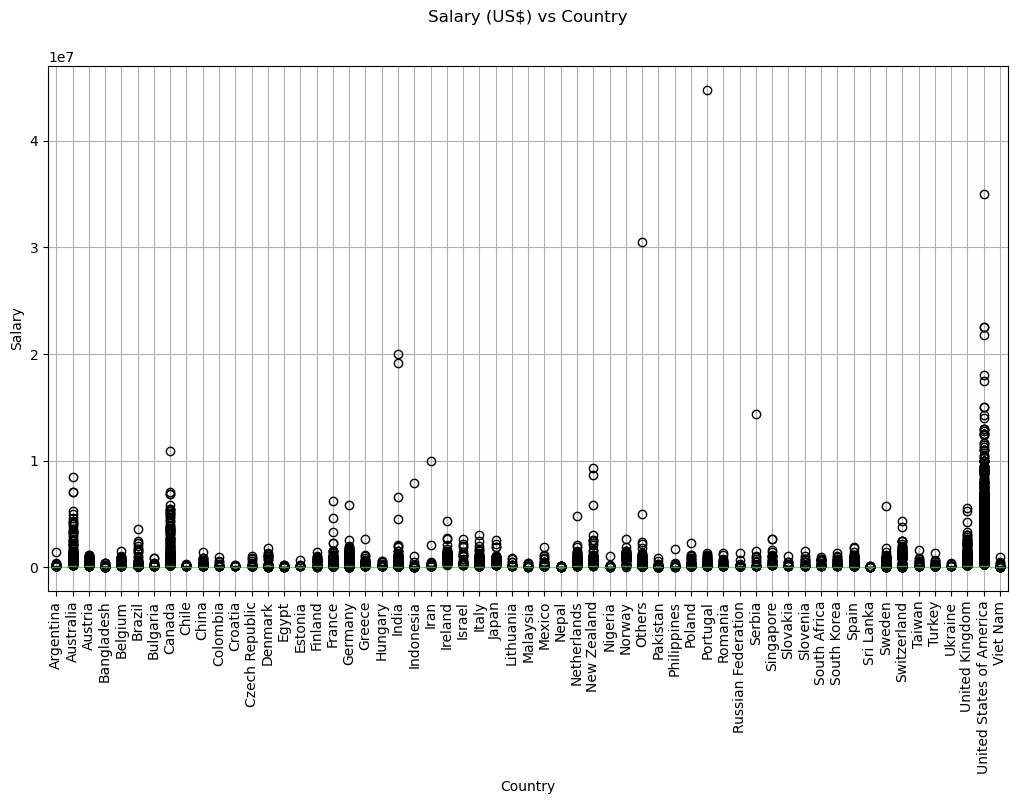

In [21]:
# Visualize salary in each country
fig, ax= plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

The boxplot above shows that there are many outliers in the salaries column. The salaries range from $0 to 2,000,000. 

The salary column will be refactored such that salaries will be between $1,000 and 250,000.

In [22]:
df= df[df['Salary'] <=250000] 

""" Salaries below $10,000 will also be excused from the dataset. 
It is expected that a full-time worker earns more than $10,000 per annum """
df= df[df['Salary'] >=1000] 

""" Data where the country falls under 'Others' (with less than 400 respondents) 
will be excluded from the dataset """
df= df[df['Country'] !='Others'] 

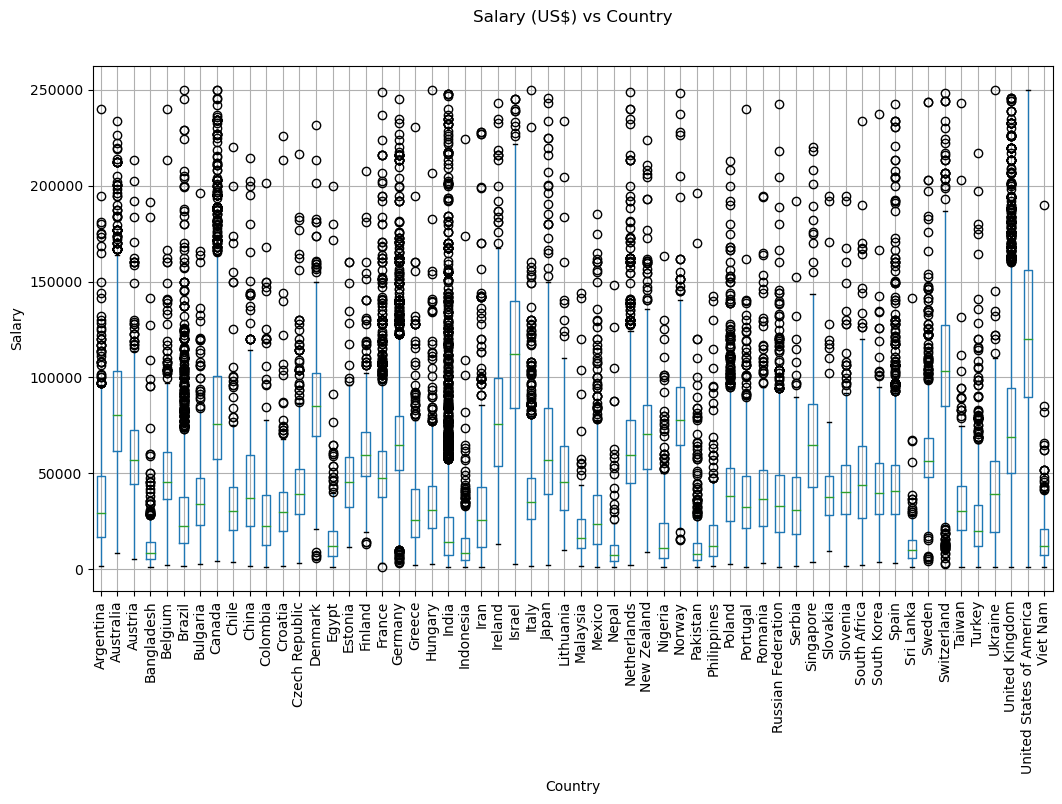

In [23]:
# Plot the boxplot again
fig, ax= plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [24]:
# Clean the YearsCodePro column which is the years of professional coding
df.YearsCodePro.unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '14', '12', '6', '28',
       '8', '23', '15', '25', 'Less than 1 year', '5', '9', '11', '21',
       '16', '18', '32', '19', '22', '38', '30', '26', '27', '24', '17',
       '34', '29', '35', '33', '36', '40', 'More than 50 years', '31',
       '37', '41', '45', '39', '42', '43', '44', '50', '49', '47', '46',
       '48'], dtype=object)

In [25]:
# Fuction to clean the YearsCodePro
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [26]:
# df.loc[df.YearsCodePro == 'More than 50 years', 'YearsCodePro'] = 50
# df.loc[df.YearsCodePro == 'Less than 1 year', 'YearsCodePro'] = 0.5

In [27]:
# Clean the EdLevel column which is the education level of repondents
df.EdLevel.unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school', 'Something else'], dtype=object)

In [28]:
# Function to clean the Education column
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return "Less than a Bachelor's degree"

df['EdLevel']= df['EdLevel'].apply(clean_education)

In [29]:
df.EdLevel.unique()

array(['Bachelor’s degree', 'Master’s degree',
       "Less than a Bachelor's degree", 'Post grad'], dtype=object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89663 entries, 7 to 221021
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       89663 non-null  object 
 1   Age           89663 non-null  object 
 2   EdLevel       89663 non-null  object 
 3   YearsCodePro  89663 non-null  float64
 4   Salary        89663 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.1+ MB


In [31]:
# Shuffle the rows
df = df.sample(frac = 1)

### Encoding
Computers understand numbers, therefore machine learning models take numeric values. The features will now be encoded

In [32]:
age_encoder= LabelEncoder()
df['Age']= age_encoder.fit_transform(df['Age'])
df['Age'].unique()

array([0, 1, 3, 2])

In [33]:
edu_encoder= LabelEncoder()
df['EdLevel']= edu_encoder.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([3, 2, 1, 0])

In [34]:
country_encoder= LabelEncoder()
df['Country']= country_encoder.fit_transform(df['Country'])
df['Country'].unique()

array([41, 38, 21,  7, 56, 32, 18, 16,  4, 55, 37,  9, 42, 17, 48, 36, 19,
       22,  2, 57, 13,  1,  5, 12, 11, 39, 46, 40,  8, 30, 23, 53, 27, 26,
        3, 25, 50, 10, 20, 47, 51, 35, 54, 29, 49,  6, 33,  0, 44, 24, 34,
       45, 43, 14, 52, 31, 28, 15])

In [35]:
df['YearsCodePro'] = df['YearsCodePro'].astype(float)

### Model development

In [36]:
# Split data into features and label
features= df.drop('Salary', axis=1)
label= df['Salary']

In [37]:
# Split Data into Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

#### Linear Regression Model

In [38]:
lin_model= LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [39]:
prediction= lin_model.predict(X_test)

In [40]:
error = np.sqrt(mean_squared_error(y_test,prediction))
print("${:,.02f}".format(error))

$43,052.18


The error means that on average, the model's prediction of an individual's salary is off by $43,052.18 

Considering that the salary used to train the model is between $10,000 and 250,000, the error is quite large.

#### Decision Tree Regressor model

In [41]:
dt_model= DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [42]:
prediction= dt_model.predict(X_test)

In [43]:
error = np.sqrt(mean_squared_error(y_test,prediction))
print("${:,.02f}".format(error))

$32,587.15


The error means that on average, the model's prediction of an individual's salary is off by $32,587.15

#### Random Forest Regressor model

In [44]:
rf_model= RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
prediction= rf_model.predict(X_test)

In [46]:
error = np.sqrt(mean_squared_error(y_test,prediction))
print("${:,.02f}".format(error))

$31,903.38


The error means that on average, the model's prediction of an individual's salary is off by $31,903.38

#### Support Vector Regression

In [47]:
svr_model = svm.SVR()
svr_model.fit(X_train,y_train)

SVR()

In [48]:
prediction= svr_model.predict(X_test)

In [49]:
error = np.sqrt(mean_squared_error(y_test,prediction))
print("${:,.02f}".format(error))

$50,187.25


Support Vector Machine's regression function error means that on average, the model's prediction of an individual's salary is off by $50,187.25

#### Grid Search Model

In [50]:
max_depth= [None, 2,4,6,8,10,12]
parameters= {'max_depth': max_depth}

dt_model = DecisionTreeRegressor()
gs_model= GridSearchCV(dt_model, parameters,scoring='neg_mean_squared_error')
gs_model.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [51]:
# Select the best eatimator based on the additional max_depth parameter using a Grid Search model
gs_model = gs_model.best_estimator_

gs_model.fit(X_train,y_train)
prediction= gs_model.predict(X_test)

In [52]:
error = np.sqrt(mean_squared_error(y_test,prediction))
print("${:,.02f}".format(error))

$31,777.56


The GridSearchCV (Grid Search Cross Validation) is designed to search through the given parameters (max_depth) and select the optimal Decision Tree Regressor. It has given the best result of all the regression models implemented. The error produced is $31,777.56; meaning the predicted salary may be off by 31,777.56

### Testing and packaging the model

In [53]:
features

,Country,Age,EdLevel,YearsCodePro
10417,41,0,3,0.5
17202,38,0,2,3.0
23621,21,0,3,4.0
211494,7,1,2,5.0
70455,7,1,1,33.0
...,...,...,...,...
97800,55,0,0,5.0
23281,55,0,1,5.0
151855,23,0,2,3.0
18842,0,0,0,0.5


In [54]:
# country, edlevel, age, yearscode
X = np.array([["Belgium", 'Master’s degree', '18-39', 15 ]])
X

array([['Belgium', 'Master’s degree', '18-39', '15']], dtype='<U21')

In [55]:
X[:, 0] = country_encoder.transform(X[:,0])
X[:, 1] = edu_encoder.transform(X[:,1])
X[:, 2] = age_encoder.transform(X[:,2])
X = X.astype(float)
X

array([[ 4.,  2.,  0., 15.]])

In [56]:
y_pred = gs_model.predict(X)
y_pred

/Users/juwonlo/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([62338.94285714])

### Save the model

In [57]:
import pickle
data= {'model': gs_model, 'country_encoder':country_encoder, 'edu_encoder':edu_encoder, 'age_encoder':age_encoder}
with open('procedures.pkl', 'wb') as file:
    pickle.dump(data, file)

In [58]:
# Open saved model
with open('procedures.pkl','rb') as file:
    data= pickle.load(file)

loaded_model= data['model']
country_encoder= data['country_encoder']
edu_encoder= data['edu_encoder']
age_encoder= data['age_encoder']

In [59]:
y_pred = loaded_model.predict(X)
y_pred

/Users/juwonlo/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([62338.94285714])

Provided that an indiviual lives in the United States, has a Master's degree, and has 15 years of working experience, their annual salary is predicted to be $147,474.70 +/- 30,945.21

### Conclusion

This project aimed to develop a machine learning model to accurately predict the annual salaries of individuals working in the tech industry. By analyzing the large dataset of IT professionals' salaries and their corresponding features gotten from the Stack Overflow survey, I was able to identify the factors that most strongly influence salary and develop a robust predictive model.

This model has the potential to provide valuable insights for IT professionals, recruiters, and employers, allowing them to make more informed decisions regarding job offers, promotions, and salary negotiations. By using the model, they can gain a deeper understanding of the factors that influence compensation in the IT industry, including education, experience, age, and location.

5 regression models were created in the course of this project, all having different error margins.
- Linear Regression model- 43,052.18
- Decision Tree model- 32,587.15
- Random Forest model- 31,903.38
- Support Vector model- 50,187.25
- Grid Search Model- $31,777.56

The best result was from the GridSearchCV. GridSearchCV performs an exhaustive search over specified paramenter values for an estimator.

I believe that this project has contributed to the development of fair and equitable compensation practices in the IT industry. By providing a reliable and accurate tool for predicting salaries, I hope to help promote transparency and fairness in the hiring and compensation process.

Overall, the project highlights the power of machine learning and data analysis in solving complex problems and generating valuable insights. As the demand for skilled IT professionals continues to grow, I believe that my model will become an increasingly valuable resource for the industry.